In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_calibration_data_file(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data

def load_calibration_data(filename):
    data = read_calibration_data_file(filename)
    
    calibration_data = {}
    
    theta_x_turns = data[:,0]
    theta_y_turns = data[:,1]
    calibration_data['qpd_x_normalised'] = data[:,2]
    calibration_data['qpd_y_normalised'] = data[:,3]
    calibration_data['qpd_sum'] = data[:,4]

    mirror_calibration = 0.73 # degrees per turn
    calibration_data['theta_x_deg'] = theta_x_turns * mirror_calibration
    calibration_data['theta_y_deg'] = theta_y_turns * mirror_calibration
    
    return calibration_data


In [3]:
filename = '../results/01-split-data/2020-02-20_QPD-calibration_mirror_horiz.csv'
data_horiz = load_calibration_data(filename)

filename = '../results/01-split-data/2020-02-20_QPD-calibration_mirror_vert.csv'
data_vert = load_calibration_data(filename)

filename = '../results/01-split-data/2020-02-20_QPD-calibration_mirror_diag-upper.csv'
data_diagupper = load_calibration_data(filename)

filename = '../results/01-split-data/2020-02-20_QPD-calibration_mirror_diag-lower.csv'
data_diaglower = load_calibration_data(filename)

Text(0, 0.5, 'QPD y-position (normalised)')

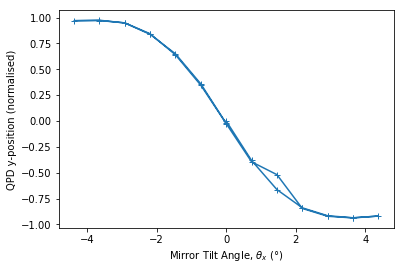

In [4]:
plt.plot(data_horiz['theta_x_deg'], data_horiz['qpd_y_normalised'], '-+')


plt.xlabel('Mirror Tilt Angle, ' + r'$\theta_x$' + ' (' + r'$\degree$' + ')')
plt.ylabel('QPD y-position (normalised)')

Text(0, 0.5, 'QPD Sum')

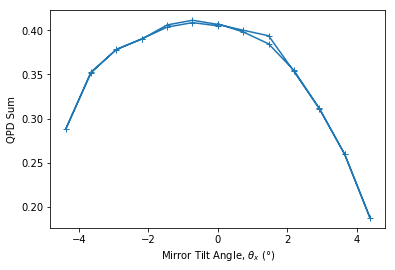

In [5]:
plt.plot(data_horiz['theta_x_deg'], data_horiz['qpd_sum'], '-+')

plt.xlabel('Mirror Tilt Angle, ' + r'$\theta_x$' + ' (' + r'$\degree$' + ')')
plt.ylabel('QPD Sum')

Text(0, 0.5, 'QPD x-position (normalised)')

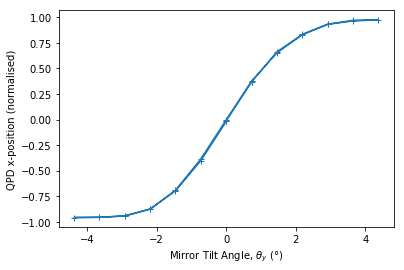

In [6]:
plt.plot(data_vert['theta_y_deg'], data_vert['qpd_x_normalised'], '-+')

plt.xlabel('Mirror Tilt Angle, ' + r'$\theta_y$' + ' (' + r'$\degree$' + ')')
plt.ylabel('QPD x-position (normalised)')

In [10]:
data_horiz

{'qpd_x_normalised': array([-0.002762,  0.040088,  0.049117,  0.06693 ,  0.080874,  0.092337,
         0.107843,  0.089532,  0.080999,  0.070464,  0.039793,  0.042698,
         0.029463,  0.018964,  0.008291, -0.014354, -0.03513 , -0.053516,
        -0.075739, -0.053024, -0.032442, -0.010131,  0.002371,  0.015485,
         0.028198]),
 'qpd_y_normalised': array([-0.000989, -0.382166, -0.663709, -0.839813, -0.916361, -0.935849,
        -0.919352, -0.937313, -0.921333, -0.845736, -0.519324, -0.395173,
        -0.025934,  0.344673,  0.638965,  0.842684,  0.948124,  0.970791,
         0.969215,  0.973541,  0.947509,  0.837252,  0.648477,  0.357764,
        -0.023767]),
 'qpd_sum': array([0.407451, 0.398172, 0.38472 , 0.354571, 0.311561, 0.259665,
        0.187247, 0.25931 , 0.311094, 0.353369, 0.393891, 0.400129,
        0.406761, 0.411472, 0.40613 , 0.390105, 0.378226, 0.352786,
        0.287801, 0.351816, 0.378432, 0.390361, 0.403644, 0.408811,
        0.405077]),
 'theta_x_deg': array([

In [58]:
#concatanate all data into one dict
   
data = {}

for key, value in data_horiz.items():
    #print(key, '->', value)
    data[key] = np.concatenate((data_horiz[key], data_vert[key], data_diagupper[key], data_diaglower[key]))
    
print(data)

{'qpd_x_normalised': array([-2.76200e-03,  4.00880e-02,  4.91170e-02,  6.69300e-02,
        8.08740e-02,  9.23370e-02,  1.07843e-01,  8.95320e-02,
        8.09990e-02,  7.04640e-02,  3.97930e-02,  4.26980e-02,
        2.94630e-02,  1.89640e-02,  8.29100e-03, -1.43540e-02,
       -3.51300e-02, -5.35160e-02, -7.57390e-02, -5.30240e-02,
       -3.24420e-02, -1.01310e-02,  2.37100e-03,  1.54850e-02,
        2.81980e-02, -1.18290e-02,  3.68403e-01,  6.62840e-01,
        8.32447e-01,  9.32115e-01,  9.64392e-01,  9.75557e-01,
        9.71378e-01,  9.32161e-01,  8.31290e-01,  6.52725e-01,
        3.76865e-01, -1.59000e-03, -3.84434e-01, -6.90636e-01,
       -8.76121e-01, -9.41945e-01, -9.56009e-01, -9.57857e-01,
       -9.55964e-01, -9.42440e-01, -8.75051e-01, -6.97018e-01,
       -4.01624e-01, -1.85780e-02,  2.59400e-03,  3.78258e-01,
        6.66709e-01,  8.37845e-01,  9.16870e-01,  9.57592e-01,
        9.22863e-01,  9.54698e-01,  9.44263e-01,  8.37974e-01,
        6.66487e-01,  3.88009e-01,

In [59]:
print(data['theta_x_deg'].shape)
print(data['theta_y_deg'].shape)
print(data['qpd_x_normalised'].shape)
print(data['qpd_y_normalised'].shape)

(100,)
(100,)
(100,)
(100,)


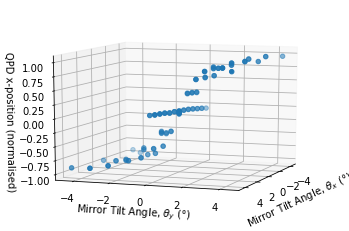

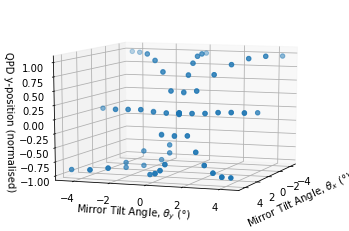

In [83]:
from mpl_toolkits.mplot3d import Axes3D

## plot QPD x-measurement 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['theta_x_deg'], data['theta_y_deg'], data['qpd_x_normalised'])
ax.set_xlabel('Mirror Tilt Angle, ' + r'$\theta_x$' + ' (' + r'$\degree$' + ')')
ax.set_ylabel('Mirror Tilt Angle, ' + r'$\theta_y$' + ' (' + r'$\degree$' + ')')
ax.set_zlabel('QPD x-position (normalised)')

ax.view_init(10, 20)

## plot QPD y-measurement

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['theta_x_deg'], data['theta_y_deg'], data['qpd_y_normalised'])
ax.set_xlabel('Mirror Tilt Angle, ' + r'$\theta_x$' + ' (' + r'$\degree$' + ')')
ax.set_ylabel('Mirror Tilt Angle, ' + r'$\theta_y$' + ' (' + r'$\degree$' + ')')
ax.set_zlabel('QPD y-position (normalised)')

ax.view_init(10, 20)

In [ ]:
# define 1D fitting

# 1D fit for x-position

# 1D fit for y-position

[ 2.98369712e+00  1.00000128e+02  1.00034731e+02  2.00777057e+01
  3.99622732e+01 -1.00793187e-03  1.00004008e+01]


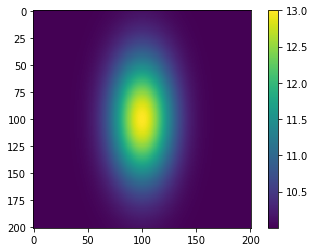

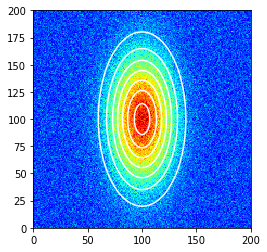

In [50]:
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

## Reshape for plotting

# Create x and y indices
x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
x, y = np.meshgrid(x, y)

#create data
data = twoD_Gaussian((x, y), 3, 100, 100, 20, 40, 0, 10)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(201, 201))
plt.colorbar()

## Do the fitting

# add some noise to the data and try to fit the data generated beforehand
initial_guess = (3,100,100,20,40,0,10)

data_noisy = data + 0.2*np.random.normal(size=data.shape)

popt, pcov = curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)

print(popt)
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
#ax.hold(True)
ax.imshow(data_noisy.reshape(201, 201), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()))
ax.contour(x, y, data_fitted.reshape(201, 201), 8, colors='w')
plt.show()